In [44]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
%matplotlib notebook

# Homopolymer 

In [49]:
def func(beta, A, beta_c):
    return A*beta/(beta_c-beta)


<IPython.core.display.Javascript object>


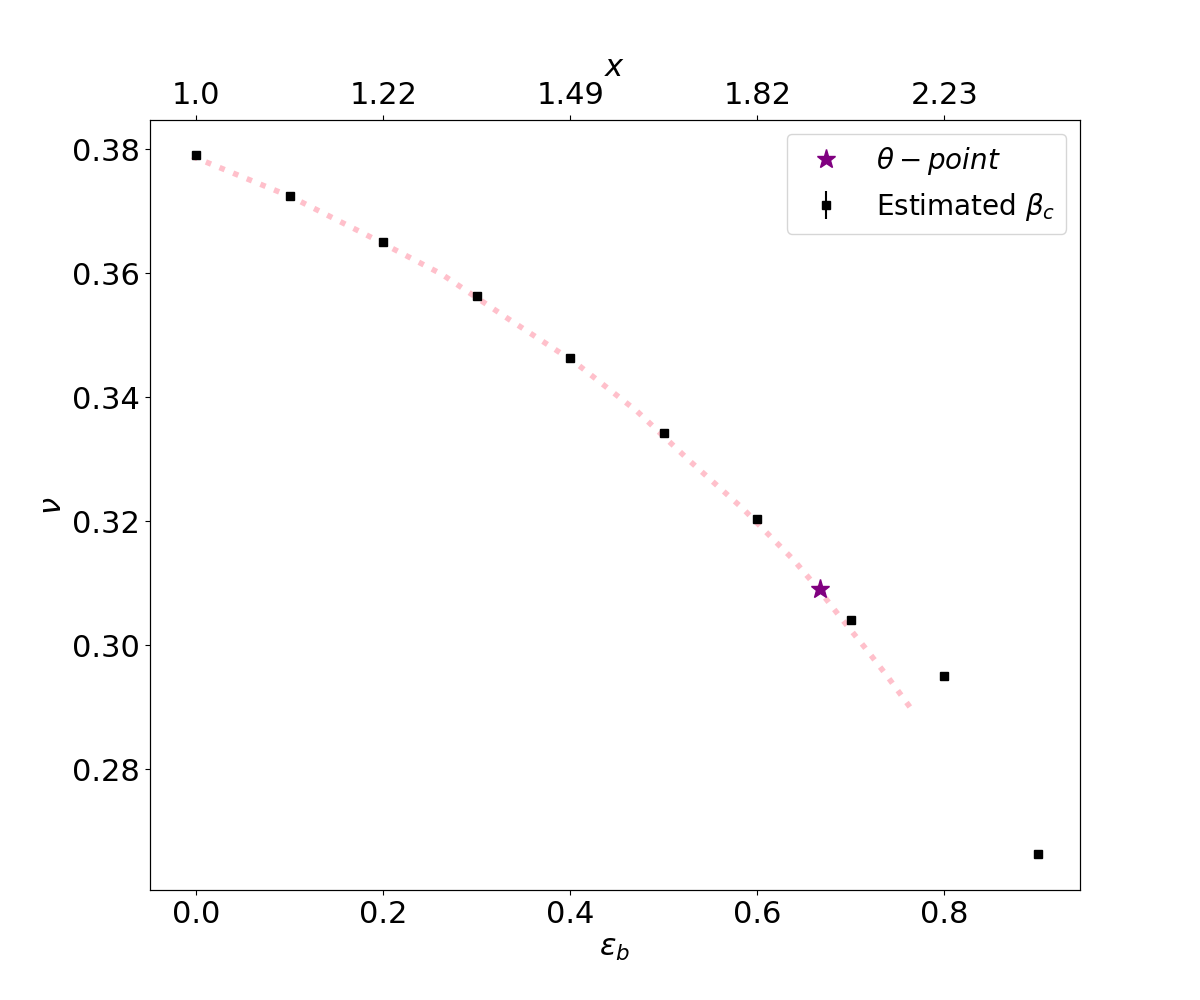

In [65]:
size = 10

v = np.zeros(size)
y = np.zeros(size)
sigmas = np.zeros(size)
ints = np.arange(size)
 
for i in range(0, size):
    filename = "/home/kamilla/SAWs/for_phase/properties_isaw_moresteps_"+str(i)+"_higher_hpc.txt"
    results = np.loadtxt(filename, skiprows=1)
    results=results[results[:,3]<100]
    chemical_potential = results[:,1] 
    fugacity=np.exp(chemical_potential)
    mean_n = results[:,2]
    disps =  results[:,3]
    popt, pcov = curve_fit(func, fugacity, mean_n)
    #print(popt[0] )
    v[i]=popt[1] 
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[1]
    y[i]=popt[0] 
    
v_homopolymer = v
   
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plt.errorbar(ints/10, v , yerr=sigmas, fmt="s", c="k", label = r"Estimated $ \beta _c $")
plt.xlabel(r'$\epsilon_b$', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

#plt.grid("True")

compare = np.loadtxt("Homopolymer_simulations/data_from_article.csv", delimiter=",")

plt.plot(np.log(compare[:,0]), 1/compare[:,1],":",lw=4,c="pink")

plt.plot([0.6675], [0.3091], "*", markersize=14, c="purple", label = r"$\theta - point$"  )
#plt.plot([np.exp(0.6673), np.exp(0.6673)], [0.24, 0.31 ],  ":",c="aqua" ,lw=3.5 , label = r"$\theta - point$")

plt.legend(loc="best", fontsize=20)
label="spread out"
plt.annotate(label, xy=(1.25, 0.27), fontsize=22)

label="globular regime"
plt.annotate(label, xy=(2.01, 0.27), fontsize=22)


ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,10,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 10, 2)/10), 2) )

plt.savefig("/home/kamilla/SAWs/Bachelor thesis/img/ph.png")

# HP-model

In [59]:
def func1(beta, A, beta_c):
    return A*beta/(0.5*beta_c-beta)

<IPython.core.display.Javascript object>


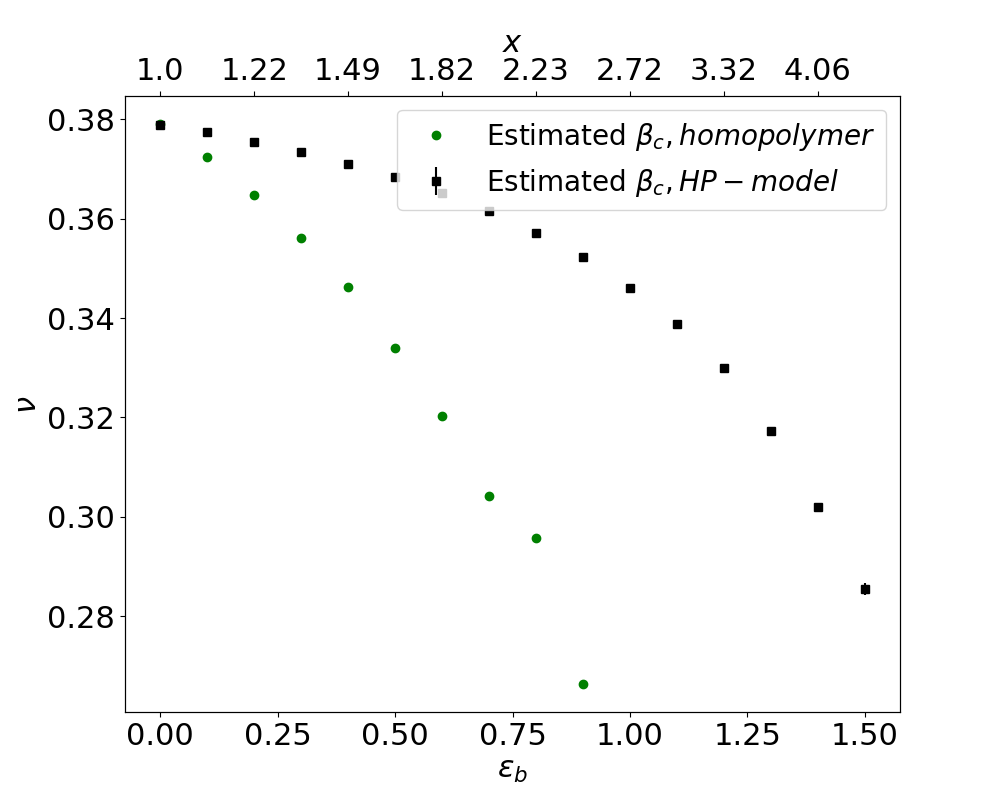

In [64]:

size = 16

v = np.zeros(size)
y = np.zeros(size)
sigmas = np.zeros(size)
ints = np.arange(size)
 
for i in range(0, size):
    filename = "/home/kamilla/SAWs/HP_attempt1/for-phase/properties_isaw_moresteps_"+str(i)+"_higher_hpc.txt"
    results = np.loadtxt(filename, skiprows=1)
    results = results[results[:,3]<100]
    chemical_potential = results[:,1] 
    fugacity=np.exp(chemical_potential)
    mean_n = results[:,2]
    disps =  results[:,3]
    popt, pcov = curve_fit(func1, fugacity, mean_n)
    #print(popt[0] )
    v[i]=popt[1] 
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[1]
    y[i]=popt[0] 
    
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plt.errorbar(ints/10, v , yerr=sigmas, fmt="s", c="k", label = r"Estimated $ \beta _c, HP-model $")
plt.xlabel(r'$\epsilon_b$', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

plt.plot(ints[:10]/10, v_homopolymer,"o", c="g", label = r"Estimated $ \beta _c, homopolymer $")
#plt.grid("True")

 
#plt.plot([0.6675], [0.3091], "*", markersize=14, c="purple", label = r"$\theta - point$"  )
#plt.plot([np.exp(0.6673), np.exp(0.6673)], [0.24, 0.31 ],  ":",c="aqua" ,lw=3.5 , label = r"$\theta - point$")

plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,16,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 16, 2)/10), 2) )

plt.savefig("/home/kamilla/SAWs/Bachelor thesis/img/ph_hp.png")